In [84]:
#To wrok with dataframe
import pandas as pd

#To perform numerical operations
import numpy as np

#To visualize data
import seaborn as sns

In [85]:
#To partation of Data
from sklearn.model_selection import train_test_split

In [86]:
# Importing Library for Logistic regression
from sklearn.linear_model import LogisticRegression

In [143]:
# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [144]:
#=============================================================================
# Importing data
# =============================================================================

data_income = pd.read_csv('income.csv')   #,na_values=[" ?"]) 
print(data_income)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [89]:
# Creating a copy of original data                                                                             
# Additional strings (" ?") to recognize as NA
data = data_income.copy()

In [90]:
#Exploratory data analysis:

#1.Getting to know the data
#2.Data preprocessing (Missing values)
#3.Cross tables and data visualization


In [91]:
# =============================================================================
# Getting to know the data
# =============================================================================
#**** To check variables' data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [92]:
#**** Check for missing values             
data.isnull()          
       

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [93]:
print('Data columns with null values:\n', data.isnull().sum())
#**** No missing values !


Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [94]:
#**** Summary of numerical variables
summary_num = data.describe()
print(summary_num) 

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [95]:
#**** Summary of categorical variables
summary_cate = data.describe(include = "O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [96]:
#**** Frequency of each categories
data['JobType'].value_counts()
data['occupation'].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [97]:
#**** Checking for unique classes
print(np.unique(data['JobType'])) 
print(np.unique(data['occupation']))
#**** There exists ' ?' instesd of nan

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [98]:
#Go back and read the data by including "na_values[' ?']" to consider ' ?' as nan !!!
data = pd.read_csv('income.csv',na_values=[" ?"]) 

In [99]:
# Data pre-processing
# =============================================================================
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [100]:
missing = data[data.isnull().any(axis=1)]
# axis=1 => to consider at least one column value is missing in a row

Points to note:
1. Missing values in Jobtype    = 1809
2. Missing values in Occupation = 1816 
3. There are 1809 rows where two specific 
   columns i.e. occupation & JobType have missing values
4. (1816-1809) = 7 => You still have occupation unfilled for 
   these 7 rows. Because, jobtype is Never worked

In [101]:
data2 = data.dropna(axis=0)
data3 = data2.copy()
data4 = data3.copy()

In [102]:
# Realtionship between independent variables:
# Select only numeric columns
numeric_data = data2.select_dtypes(include=[np.number])

# Compute correlation
correlation = numeric_data.corr()

# =============================================================================
# Cross tables & Data Visualization
# =============================================================================
# Extracting the column names
# data2.columns   
# =============================================================================
# Gender proportion table:
# =============================================================================


In [103]:
gender = pd.crosstab(index = data2["gender"], columns  = 'count', normalize = True)
print(gender)

col_0      count
gender          
Female  0.324315
Male    0.675685


In [104]:
# =============================================================================
#  Gender vs Salary Status:
# =============================================================================
gender_salstat = pd.crosstab(index = data2["gender"],columns = data2['SalStat'], margins = True, normalize =  'index') 
                 # Include row and column totals
print(gender_salstat)

# =============================================================================

SalStat  greater than 50,000  less than or equal to 50,000
gender                                                    
 Female             0.113678                      0.886322
 Male               0.313837                      0.686163
All                 0.248922                      0.751078


"  75 % of people's salary status is <=50,000 \n     & 25% of people's salary status is > 50,000\n"

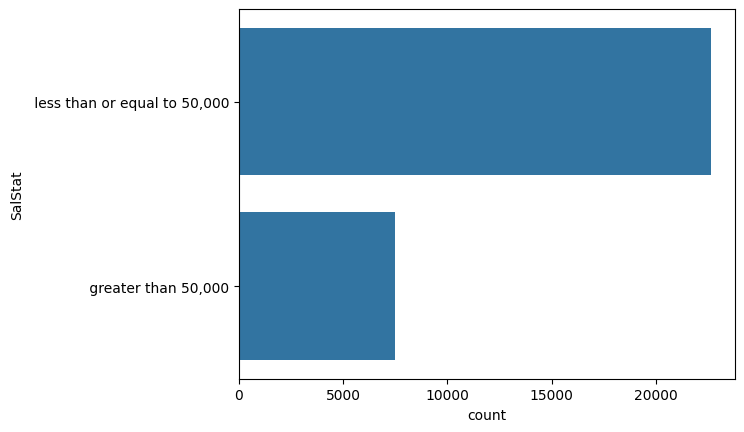

In [105]:
# Frequency distribution of 'Salary status' 
# =============================================================================
SalStat = sns.countplot(data2['SalStat'])

"""  75 % of people's salary status is <=50,000 
     & 25% of people's salary status is > 50,000
"""

<Axes: xlabel='age', ylabel='Count'>

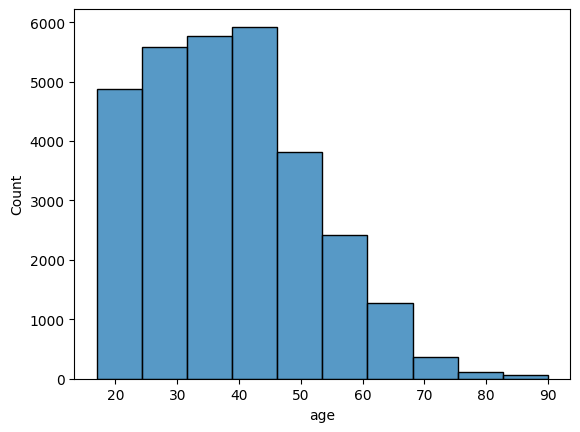

In [153]:
##############  Histogram of Age  #############################
sns.histplot(data2['age'], bins=10, kde=False)
# People with age 20-45 age are high in frequency

SalStat
greater than 50,000             43.0
less than or equal to 50,000    34.0
Name: age, dtype: float64

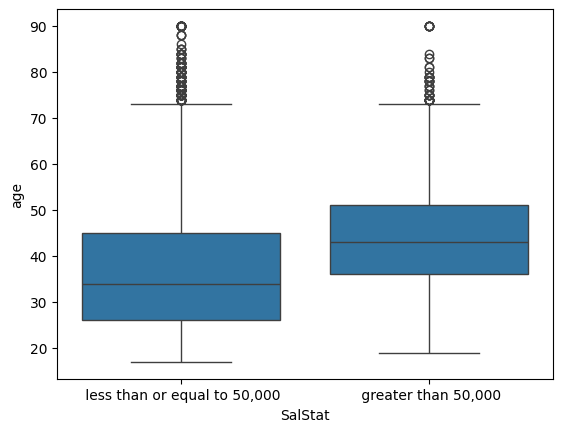

In [107]:
############# Box Plot - Age vs Salary status #################
sns.boxplot(x='SalStat', y='age', data=data2)
data2.groupby('SalStat')['age'].median()

## people with 35-50 age are more likely to earn > 50000 USD p.a
## people with 25-35 age are more likely to earn <= 50000 USD p.a

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


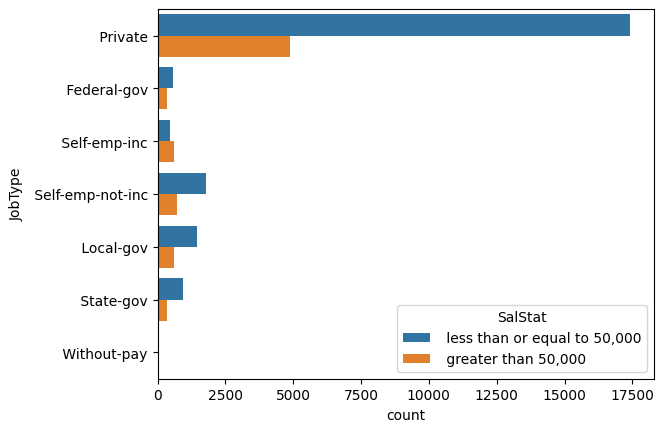

In [108]:
#*** Jobtype
JobType     = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


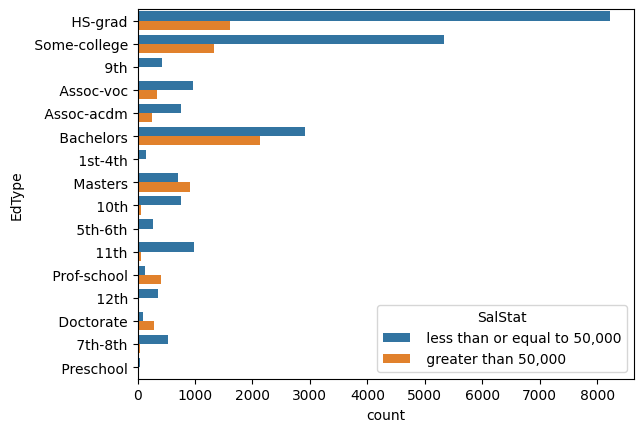

In [109]:
#*** Education
Education   = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


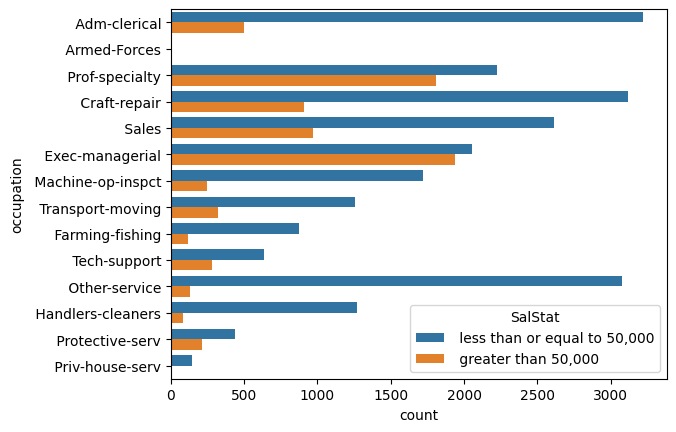

In [110]:
Occupation  = sns.countplot(y=data2['occupation'],hue = 'SalStat', data=data2)
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)

<Axes: xlabel='capitalgain', ylabel='Count'>

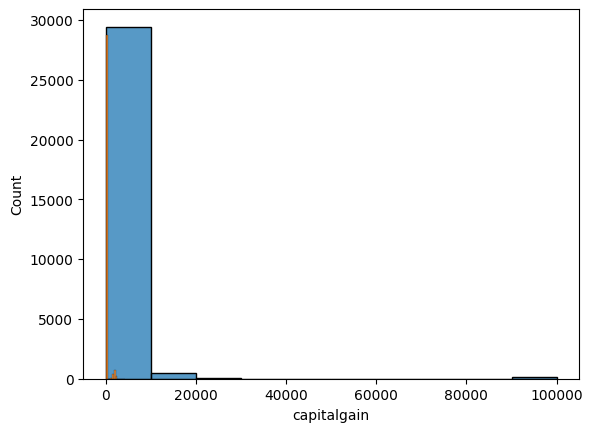

In [154]:
#*** Capital gain
sns.histplot(data2['capitalgain'], bins = 10, kde = False)

sns.histplot(data2['capitalloss'], bins = 10, kde = False)



# =============================================================================
# LOGISTIC REGRESSION
# =============================================================================

In [112]:
# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\devan\AppData\Local\Temp\ipykernel_15588\3780203023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [113]:
new_data=pd.get_dummies(data2, drop_first=True)

In [114]:
# Storing the column names 
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [115]:
# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['EdType_ 7th-8th', 'occupation_ Craft-repair', 'nativecountry_ France', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Portugal', 'nativecountry_ Iran', 'race_ White', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'nativecountry_ Taiwan', 'JobType_ Private', 'JobType_ State-gov', 'nativecountry_ Dominican-Republic', 'nativecountry_ Guatemala', 'nativecountry_ Peru', 'nativecountry_ Hong', 'nativecountry_ Cuba', 'race_ Other', 'maritalstatus_ Never-married', 'nativecountry_ Poland', 'race_ Asian-Pac-Islander', 'nativecountry_ Mexico', 'occupation_ Tech-support', 'occupation_ Machine-op-inspct', 'capitalgain', 'EdType_ Assoc-acdm', 'JobType_ Self-emp-not-inc', 'occupation_ Handlers-cleaners', 'occupation_ Priv-house-serv', 'age', 'nativecountry_ Vietnam', 'EdType_ Assoc-voc', 'JobType_ Self-emp-inc', 'EdType_ 9th', 'gender_ Male', 'nativecountry_ Jamaica', 'nativecountry_ Columbia', 'EdType_ Some-college', 'maritalstatus_ Widowed', 'nativecountry_ Haiti', 'EdType_ HS-grad', 'native

In [116]:
# Storing the output values in y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [117]:
# Storing the values from input features
x = new_data[features].values
print(x)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [118]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [119]:
# Make an instance of the Model
logistic = LogisticRegression()

In [120]:
# Fitting the values for x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

C:\Users\devan\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.04043759])

In [121]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)


[0 0 0 ... 0 0 0]


In [122]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6293  530]
 [ 950 1276]]


In [123]:
# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8364460161343795


In [124]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y != prediction).sum())
# =============================================================================

Misclassified samples: 1480


# LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES
# =============================================================================

In [125]:
# Reindexing the salary status names to 0,1
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [126]:
cols = ['gender','nativecountry','race','JobType']
new_data = data3.drop(cols,axis = 1)

In [127]:
new_data=pd.get_dummies(new_data, drop_first=True)

In [128]:
# Storing the column names 
columns_list2=list(new_data.columns)
print(columns_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [129]:
# Separating the input names from data
features2=list(set(columns_list2)-set(['SalStat']))
print(features2)

['EdType_ 12th', 'EdType_ 7th-8th', 'occupation_ Craft-repair', 'relationship_ Wife', 'occupation_ Other-service', 'occupation_ Armed-Forces', 'EdType_ Preschool', 'EdType_ Prof-school', 'maritalstatus_ Separated', 'maritalstatus_ Never-married', 'EdType_ 11th', 'occupation_ Machine-op-inspct', 'occupation_ Tech-support', 'capitalgain', 'EdType_ Assoc-acdm', 'EdType_ Bachelors', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Married-civ-spouse', 'EdType_ 1st-4th', 'EdType_ Masters', 'occupation_ Handlers-cleaners', 'occupation_ Priv-house-serv', 'hoursperweek', 'age', 'occupation_ Sales', 'EdType_ Assoc-voc', 'EdType_ 9th', 'EdType_ 5th-6th', 'relationship_ Own-child', 'relationship_ Other-relative', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'EdType_ Some-college', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'maritalstatus_ Widowed', 'maritalstatus_ Married-AF-spouse', 'occupation_ Farming-fishing', 'EdType_ HS-grad', 'EdType_ Doctorate', 

In [130]:
# Storing the output values in y
y2=new_data['SalStat'].values
print(y2)

[0 0 1 ... 0 0 0]


In [131]:
# Storing the values from input features
x2 = new_data[features2].values
print(x2)

[[False False False ... False False 0]
 [False False False ... False False 0]
 [False False False ... False False 0]
 ...
 [False False False ... False False 0]
 [False False False ... False False 0]
 [False False False ... False False 0]]


In [132]:
# Splitting the data into train and test
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)

In [133]:
# Make an instance of the Model
logistic2 = LogisticRegression()

In [134]:
# Fitting the values for x and y
logistic2.fit(train_x2,train_y2)

C:\Users\devan\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
# Prediction from test data
prediction2 = logistic2.predict(test_x2)

In [136]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y2 != prediction2).sum())

Misclassified samples: 1504


# =============================================================================
# KNN
# =============================================================================

In [137]:
# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier

In [138]:
# import library for ploting 
import matplotlib.pyplot as plt

In [139]:
# Storing the K nearest neighbors classifier 5 neighbors
KNN_classifier = KNeighborsClassifier(n_neighbors = 5) 

In [140]:
# Fitting the values for X and Y
KNN_classifier.fit(train_x, train_y) 

KNeighborsClassifier()

In [141]:
# Predicting the test values with model
prediction = KNN_classifier.predict(test_x)

In [145]:
# Performance metric check
confusionMmatrix = confusion_matrix(test_y, prediction)
print(confusionMmatrix)

[[6176  647]
 [ 808 1418]]


In [146]:
# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8392087523483258


In [147]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

"""
Effect of K value on classifier
"""

Misclassified samples: 1455


'\nEffect of K value on classifier\n'

In [151]:
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

print(Misclassified_sample)

[np.int64(1766), np.int64(1516), np.int64(1522), np.int64(1437), np.int64(1455), np.int64(1455), np.int64(1456), np.int64(1452), np.int64(1481), np.int64(1432), np.int64(1465), np.int64(1446), np.int64(1451), np.int64(1435), np.int64(1421), np.int64(1415), np.int64(1435), np.int64(1423), np.int64(1443)]


# =============================================================================
# END OF SCRIPT
# =============================================================================